# Notebook to check the access of wind and waves satellite from the NASA PODAAC site:
https://podaac.jpl.nasa.gov/ 
<br>
--> Access data --> OpeNDAP

# Refs
* 00-data-access.ipynb

In [4]:
import cf_xarray
import xarray as xr

# Wind data

## Test 01

In [17]:
url_winds_01 = "https://opendap.jpl.nasa.gov/opendap/OceanWinds/quikscat/L3/jpl/v2/hdf/2009/QS_XWGRD3_2009001.20090021525.gz?asc_avg_wind_speed_sq[0:1:719][0:1:1439],des_avg_wind_speed_sq[0:1:719][0:1:1439]"


In [18]:
ds = xr.open_dataset(url_winds_01)
ds.cf

Coordinates:
- CF Axes:   X, Y, Z, T: n/a

- CF Coordinates:   longitude, latitude, vertical, time: n/a

- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

Data Variables:
- Cell Measures:   area, volume: n/a

- Standard Names:   n/a

- Bounds:   n/a

In [19]:
ds

<xarray.Dataset>
Dimensions:                (fakeDim12: 720, fakeDim13: 1440, fakeDim14: 720,
                            fakeDim15: 1440)
Dimensions without coordinates: fakeDim12, fakeDim13, fakeDim14, fakeDim15
Data variables:
    asc_avg_wind_speed_sq  (fakeDim12, fakeDim13) float64 ...
    des_avg_wind_speed_sq  (fakeDim14, fakeDim15) float64 ...
Attributes: (12/48)
    LongName:                          char\n1\nQuikSCAT Level 3 Ocean Wind V...
    ShortName:                         char\n1\nQSCATL3\n
    producer_agency:                   char\n1\nNASA\n
    producer_institution:              char\n1\nJPL\n
    PlatformType:                      char\n1\nspacecraft\n
    InstrumentShortName:               char\n1\nSeaWinds\n
    ...                                ...
    des_rain_prob_dim_0.name:          fakeDim26
    des_rain_prob_dim_1.name:          fakeDim27
    asc_rain_flag_dim_0.name:          fakeDim28
    asc_rain_flag_dim_1.name:          fakeDim29
    des_rain_flag_dim_0.name:          fakeDim30
    des_rain_flag_dim_1.name:          fakeDim31

In [20]:
ds.asc_avg_wind_speed_sq.shape

(720, 1440)

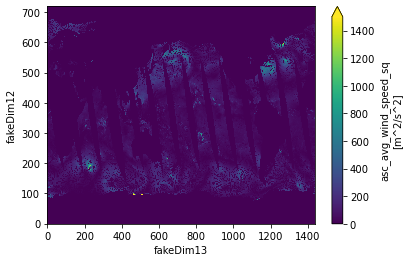

In [21]:
ds.asc_avg_wind_speed_sq.plot(vmax=1500)

### Ignoring the 0 values:

In [22]:
ds = ds.where(ds > 0)

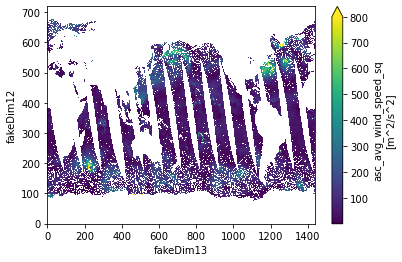

In [24]:
ds.asc_avg_wind_speed_sq.plot(vmax=800)

## Test 02

https://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/OceanWinds/qscat/jpl/aggregate__QSCAT_LEVEL_3_V2.ncml.html

In [10]:
url_winds_02 = "https://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/OceanWinds/qscat/jpl/aggregate__QSCAT_LEVEL_3_V2.ncml?time[0:1:3803],asc_avg_wind_speed[0:1:380][0:1:719][0:1:1439],des_avg_wind_speed[0:1:380][0:1:719][0:1:1439],lat[0:1:719],lon[0:1:1439]"

In [11]:
ds = xr.open_dataset(url_winds_02)
ds

<xarray.Dataset>
Dimensions:             (time: 3804, lat: 720, lon: 1440, time_1: 381)
Coordinates:
  * time                (time) datetime64[ns] 1999-07-19 ... 2009-11-21
  * lat                 (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float64 0.125 0.375 0.625 ... 359.4 359.6 359.9
Dimensions without coordinates: time_1
Data variables:
    asc_avg_wind_speed  (time_1, lat, lon) float32 ...
    des_avg_wind_speed  (time_1, lat, lon) float32 ...
Attributes: (12/52)
    LongName:                   char\n1\nQuikSCAT Level 3 Ocean Wind Vectors ...
    ShortName:                  char\n1\nQSCATL3\n
    producer_agency:            char\n1\nNASA\n
    producer_institution:       char\n1\nJPL\n
    PlatformType:               char\n1\nspacecraft\n
    InstrumentShortName:        char\n1\nSeaWinds\n
    ...                         ...
    EXTRA_DIMENSION.fakeDim26:  720
    EXTRA_DIMENSION.fakeDim27:  1440
    EXTRA_DIMENSION.fakeDim28:  720
    EXTRA_DIMENSION.fakeDim29:  1440
    EXTRA_DIMENSION.fakeDim30:  720
    EXTRA_DIMENSION.fakeDim31:  1440

In [12]:
ds.asc_avg_wind_speed.shape

(381, 720, 1440)

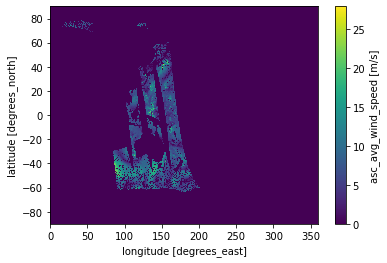

In [13]:
ds.asc_avg_wind_speed[0,:,:].plot()

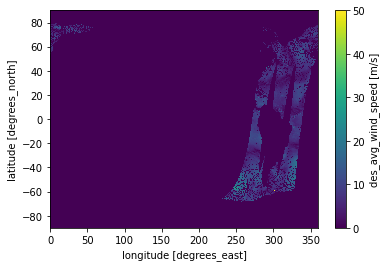

In [24]:
ds.des_avg_wind_speed[0,:,:].plot()

## Other wind satellite data from PODAAC:

* https://opendap.jpl.nasa.gov/opendap/OceanWinds/cygnss/L3/v3.0/2021/004/cyg.ddmi.s20210104-003000-e20210104-233000.l3.grid-wind.a30.d31.nc.html
* https://opendap.jpl.nasa.gov/opendap/OceanWinds/cygnss/L3/cdr_v1.2/2021/004/cyg.ddmi.s20210104-003000-e20210104-233000.l3.grid-wind-cdr.a12.d12.nc.html
* https://opendap.jpl.nasa.gov/opendap/OceanWinds/ascat/L2/metop_a/cdr/12km/2013/004/ascat_20130104_031837_metopa_32227_eps_o_coa_ovw.l2.nc.gz"
* https://opendap.jpl.nasa.gov/opendap/OceanWinds/ccmp/L3.5a/monthly/flk/2009/month_20090101_v11l35flk.nc.gz
* https://opendap.jpl.nasa.gov/opendap/OceanWinds/nscat/L3/v2/hdf/S12/S3096327.HDF.Z
* https://opendap.jpl.nasa.gov/opendap/OceanWinds/oceansat2/L2B/oscat/jpl/v2/2014/008/os2_l2b2014008_22734_22735.nc.gz

# Waves data

## Test 01:

In [45]:
url_waves_01 = "https://opendap.jpl.nasa.gov/opendap/SeaSurfaceTopography/jason3/preview/L2/GPS-OGDR/c103/JA3_GPSOPR_2PdS103_001_20181124_205057_20181124_224542.nc?time[0:1:6670],lat[0:1:6670],lon[0:1:6670],swh_ku[0:1:6670],ssha[0:1:6670]"

In [46]:
ds = xr.open_dataset(url_waves_01)
ds

<xarray.Dataset>
Dimensions:  (time: 6671)
Coordinates:
  * time     (time) datetime64[ns] 2018-11-24T20:50:57.478607232 ... 2018-11-...
    lat      (time) float64 ...
    lon      (time) float64 ...
Data variables:
    swh_ku   (time) float32 ...
    ssha     (time) float32 ...
Attributes: (12/36)
    Conventions:                      CF-1.1
    title:                            GPSOGDR - Reduced dataset
    institution:                      NOAA(OGDR) JPL(GPSOGDR)
    source:                           radar altimeter
    history:                          2018-11-25 02:22:06 : Append gps_alt an...
    contact:                          JPL podaac@podaac.jpl.nasa.gov
    ...                               ...
    xref_orf_data:                    JA3_ORF_AXXCNE20181124_082600_20160212_...
    xref_meteorological_files:        SMM_APP_AXVCNE20181123_181128_20181124_...
    xref_utc_tai_data:                SMM_TUC_AXVCNE20161207_152427_19900101_...
    xref_radiometer_calibration:      AJ3_AL1_AXVJPL20070809_053513_20070809_...
    ellipsoid_axis:                   6378136.3
    ellipsoid_flattening:             0.0033528131778969

In [47]:
ds.swh_ku.shape

(6671,)

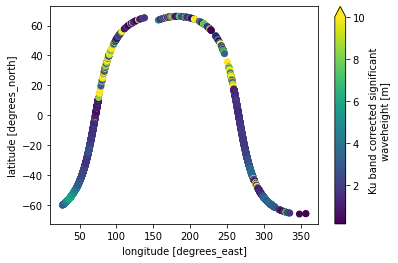

In [50]:
ds.plot.scatter(x="lon", y="lat", hue="swh_ku", vmax=10)